### Imports

In [30]:
%load_ext autoreload
%autoreload 2

from jordan_wigner import jw_majoranas
from electronic_hamiltonian import quadratic_terms, quartic_terms
from qiskit.quantum_info import PauliList
from tableau import spread_node, spread_node_slice, anticommutation_matrix
from cost_functions import weight, quadratic_term_mean_weight, quartic_term_mean_weight
from annealing import anneal
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Create Majorana Strings using Jordan-Wigner-Mapping

In [35]:
N = 15

x, z = jw_majoranas(N)

paulis = PauliList.from_symplectic(z, x)

print("Majorana Operators:", paulis)

Majorana Operators: ['IIIIIIIIIIIIIIX', 'IIIIIIIIIIIIIXZ', 'IIIIIIIIIIIIXZZ',
 'IIIIIIIIIIIXZZZ', 'IIIIIIIIIIXZZZZ', 'IIIIIIIIIXZZZZZ',
 'IIIIIIIIXZZZZZZ', 'IIIIIIIXZZZZZZZ', 'IIIIIIXZZZZZZZZ',
 'IIIIIXZZZZZZZZZ', 'IIIIXZZZZZZZZZZ', 'IIIXZZZZZZZZZZZ',
 'IIXZZZZZZZZZZZZ', 'IXZZZZZZZZZZZZZ', 'XZZZZZZZZZZZZZZ',
 'IIIIIIIIIIIIIIY', 'IIIIIIIIIIIIIYZ', 'IIIIIIIIIIIIYZZ',
 'IIIIIIIIIIIYZZZ', 'IIIIIIIIIIYZZZZ', 'IIIIIIIIIYZZZZZ',
 'IIIIIIIIYZZZZZZ', 'IIIIIIIYZZZZZZZ', 'IIIIIIYZZZZZZZZ',
 'IIIIIYZZZZZZZZZ', 'IIIIYZZZZZZZZZZ', 'IIIYZZZZZZZZZZZ',
 'IIYZZZZZZZZZZZZ', 'IYZZZZZZZZZZZZZ', 'YZZZZZZZZZZZZZZ']


### (Optional) Compute all possible quadratic and quartic terms

In [10]:
x_terms, z_terms = quadratic_terms(x, z, N)
quadratic_terms_paulis = PauliList.from_symplectic(z_terms, x_terms)

print("Quadratic Hamiltonian Terms:", quadratic_terms_paulis)

x_terms, z_terms = quartic_terms(x, z, N)
quartic_terms_paulis = PauliList.from_symplectic(z_terms, x_terms)

print("Quartic Hamiltonian Terms:", quartic_terms_paulis)

print(f"Average Weight: {weight(x, z)}")

Quadratic Hamiltonian Terms: ['IIIIIIIIIIIIIIIIIIXY', 'IIIIIIIIIIIIIIIIIXZY',
 'IIIIIIIIIIIIIIIIXZZY', 'IIIIIIIIIIIIIIIXZZZY',
 'IIIIIIIIIIIIIIXZZZZY', 'IIIIIIIIIIIIIXZZZZZY',
 'IIIIIIIIIIIIXZZZZZZY', 'IIIIIIIIIIIXZZZZZZZY',
 'IIIIIIIIIIXZZZZZZZZY', 'IIIIIIIIIXZZZZZZZZZY',
 'IIIIIIIIXZZZZZZZZZZY', 'IIIIIIIXZZZZZZZZZZZY',
 'IIIIIIXZZZZZZZZZZZZY', 'IIIIIXZZZZZZZZZZZZZY',
 'IIIIXZZZZZZZZZZZZZZY', 'IIIXZZZZZZZZZZZZZZZY',
 'IIXZZZZZZZZZZZZZZZZY', 'IXZZZZZZZZZZZZZZZZZY',
 'XZZZZZZZZZZZZZZZZZZY', 'IIIIIIIIIIIIIIIIIXYI',
 'IIIIIIIIIIIIIIIIXZYI', 'IIIIIIIIIIIIIIIXZZYI',
 'IIIIIIIIIIIIIIXZZZYI', 'IIIIIIIIIIIIIXZZZZYI',
 'IIIIIIIIIIIIXZZZZZYI', 'IIIIIIIIIIIXZZZZZZYI',
 'IIIIIIIIIIXZZZZZZZYI', 'IIIIIIIIIXZZZZZZZZYI',
 'IIIIIIIIXZZZZZZZZZYI', 'IIIIIIIXZZZZZZZZZZYI',
 'IIIIIIXZZZZZZZZZZZYI', 'IIIIIXZZZZZZZZZZZZYI',
 'IIIIXZZZZZZZZZZZZZYI', 'IIIXZZZZZZZZZZZZZZYI',
 'IIXZZZZZZZZZZZZZZZYI', 'IXZZZZZZZZZZZZZZZZYI',
 'XZZZZZZZZZZZZZZZZZYI', 'IIIIIIIIIIIIIIIIXYII',
 'IIIIIIIIIIIIIIIXZYII', 'IIIIIIIIIIIIII

### Simulated Annealing

T0 = 30
T0 = 30


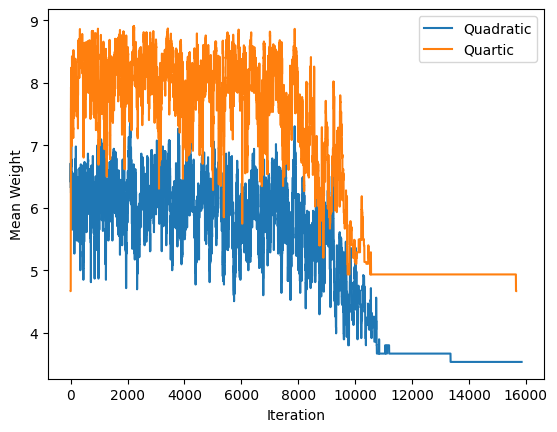

In [36]:
x, z, energies, energy_opt = anneal(x, z, explore=spread_node, energy=quadratic_term_mean_weight, cooling_rate=0.9995)
paulis = PauliList.from_symplectic(z, x)

plt.plot(energies, label="Quadratic")

x, z, energies, energy_opt = anneal(x, z, explore=spread_node, energy=quartic_term_mean_weight, cooling_rate=0.9995)
paulis = PauliList.from_symplectic(z, x)

plt.plot(energies, label="Quartic")

plt.xlabel("Iteration")
plt.ylabel("Mean Weight")
plt.legend()

T0 = 30


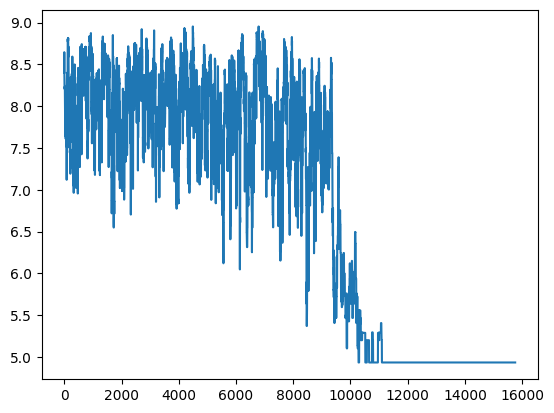

In [34]:
x, z, energies, energy_opt = anneal(x, z, explore=spread_node, energy=quartic_term_mean_weight, cooling_rate=0.9995)

paulis = PauliList.from_symplectic(z, x)

plt.plot(energies)

### Locality Analysis

In [41]:
quadratic_weights = []
quartic_weights = []

num_qubits = list(range(10, 131, 10))

for N in num_qubits:

    x, z = jw_majoranas(N)
    x, z, energies, energy_opt = anneal(x, z, explore=spread_node, energy=quadratic_term_mean_weight, cooling_rate=0.9995)
    
    quadratic_weights.append(energy_opt)
    quartic_weights.append(quartic_term_mean_weight(x, z))

T0 = 20
T0 = 40
T0 = 60
T0 = 80
T0 = 100
T0 = 120
T0 = 140
T0 = 160
T0 = 180
T0 = 200
T0 = 220
T0 = 240
T0 = 260


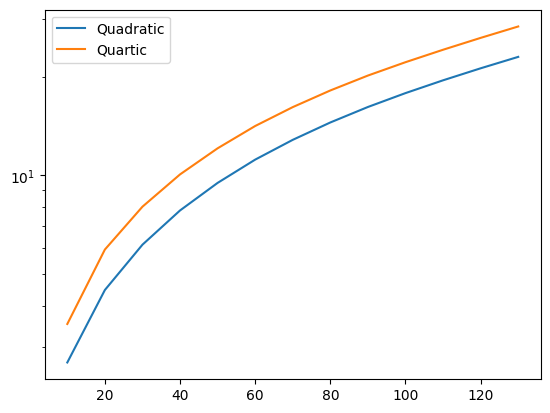

In [42]:
plt.plot(num_qubits, quadratic_weights, label="Quadratic")
plt.plot(num_qubits, quartic_weights, label="Quartic")
plt.yscale("log")
plt.legend()